<a href="https://colab.research.google.com/github/seyoungkwon29/TeamProject/blob/main/%EB%8B%A4%EC%A4%91_%ED%81%B4%EB%9E%98%EC%8A%A4_%EC%BD%98%ED%81%AC%EB%A6%AC%ED%8A%B8_%EA%B2%B0%ED%95%A8_%EB%B6%84%EB%A5%98%EB%A5%BC_%EC%9C%84%ED%95%9C_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8A%A4%ED%83%9C%ED%82%B9_%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deepstack

In [ ]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import datetime as dt
import tensorflow as tf
import matplotlib.pyplot as plt

from pathlib import Path
from tqdm import tqdm
from imutils import paths
from keras import applications, Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from keras.models import Model, Input
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Average
from keras.layers import GlobalAveragePooling2D, Activation, AveragePooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
batch_size = 64
epochs = 50
input_shape = (160, 160, 3)
n_class = 4

# **Datasets**

In [ ]:
# Data augment
aug = ImageDataGenerator(rotation_range=25,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         shear_range=0.2,
                         zoom_range=0.2,
                         horizontal_flip=True,
                         fill_mode='nearest'
                         )

In [ ]:
dir_ = Path('./drive/MyDrive/data/concrete')
image_paths = sorted(list(paths.list_images(dir_)))

print("Image count : ", len(image_paths))

Image count :  6000


In [ ]:
images = []
labels = []

for image_path in tqdm(image_paths):
  image = cv2.imread(image_path)
  image = cv2.resize(image, (input_shape[1], input_shape[0]))
  images.append(image)

  label = image_path.split(os.path.sep)[-2]
  labels.append([label])

print("Images count : ", len(images))

100%|██████████| 6000/6000 [13:04<00:00,  7.65it/s]

Images count :  6000


In [ ]:
images = np.array(images, dtype='float32') / 255.0
labels = np.array(labels)

mlb = MultiLabelBinarizer()
enc_labels = mlb.fit_transform(labels)

print("Classes name : ", mlb.classes_)

Classes name :  ['crack' 'exposure' 'leak' 'peeling']


In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(images,
                                                      enc_labels,
                                                      test_size=0.2,
                                                      random_state=42)

print("train test shape : {} {}".format(X_train.shape, y_train.shape))

train test shape : (4800, 160, 160, 3) (4800, 4)


# **Models**

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet

base_model_1 = MobileNet(include_top=False, weights='imagenet', input_shape=input_shape, pooling='avg')

model_1 = Sequential()

model_1.add(base_model_1)
model_1.add(BatchNormalization())
model_1.add(Flatten())
model_1.add(Dropout(0.5))
model_1.add(Dense(512, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(200, activation='relu'))
model_1.add(Dense(n_class, activation='softmax'))

model_1.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_160 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                         

In [ ]:
from tensorflow.keras.applications.xception import Xception, preprocess_input

base_model_2 = Xception(include_top=False, weights='imagenet',input_shape=input_shape, pooling='avg')

model_2 = Sequential()

model_2.add(base_model_2)
model_2.add(BatchNormalization())
model_2.add(Flatten())
model_2.add(Dropout(0.5))
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(200, activation='relu'))
model_2.add(Dense(n_class, activation='softmax'))

model_2.summary()

83697664/83683744 [==============================] - 2s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 batch_normalization_5 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_3 (Dropout)         (None, 512)               

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model_3 = InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape, pooling='avg')

model_3 = Sequential()

model_3.add(base_model_3)
model_3.add(BatchNormalization())
model_3.add(Flatten())
model_3.add(Dropout(0.5))
model_3.add(Dense(512, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(200, activation='relu'))
model_3.add(Dense(n_class, activation='softmax'))

model_3.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 batch_normalization_100 (Ba  (None, 2048)             8192      
 tchNormalization)                                               
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_5 (Dropout)         (None, 512)               

# **Training**

In [ ]:
# Model Compile
learning_rate = 1e-3
decay = learning_rate / epochs
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, decay=decay)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

model_1.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=['accuracy']
)
model_2.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=['accuracy']
)
model_3.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=['accuracy']
)

In [ ]:
history_1 = model_1.fit(
	aug.flow(X_train, y_train, batch_size=batch_size),
	validation_data=(X_test, y_test),
	steps_per_epoch=len(X_train) // batch_size,
	epochs=epochs,
  verbose=1
)

Epoch 1/50
75/75 [==============================] - 42s 349ms/step - loss: 1.1663 - accuracy: 0.5727 - val_loss: 0.7485 - val_accuracy: 0.7158
Epoch 2/50
75/75 [==============================] - 25s 332ms/step - loss: 0.7428 - accuracy: 0.7217 - val_loss: 0.8329 - val_accuracy: 0.7192
Epoch 3/50
75/75 [==============================] - 25s 330ms/step - loss: 0.6299 - accuracy: 0.7708 - val_loss: 0.5555 - val_accuracy: 0.8058
Epoch 4/50
75/75 [==============================] - 25s 337ms/step - loss: 0.5614 - accuracy: 0.7931 - val_loss: 1.1848 - val_accuracy: 0.6808
Epoch 5/50
75/75 [==============================] - 25s 332ms/step - loss: 0.5014 - accuracy: 0.8135 - val_loss: 0.7327 - val_accuracy: 0.7800
Epoch 6/50
75/75 [==============================] - 25s 336ms/step - loss: 0.4741 - accuracy: 0.8338 - val_loss: 0.5992 - val_accuracy: 0.8033
Epoch 7/50
75/75 [==============================] - 26s 343ms/step - loss: 0.4639 - accuracy: 0.8344 - val_loss: 1.3390 - val_accuracy: 0.6417

In [ ]:
history_2 = model_2.fit(
	aug.flow(X_train, y_train, batch_size=batch_size),
	validation_data=(X_test, y_test),
	steps_per_epoch=len(X_train) // batch_size,
	epochs=epochs,
  verbose=1
)

Epoch 1/50
75/75 [==============================] - 61s 696ms/step - loss: 1.4403 - accuracy: 0.2892 - val_loss: 10.1477 - val_accuracy: 0.2650
Epoch 2/50
75/75 [==============================] - 50s 660ms/step - loss: 1.3119 - accuracy: 0.3502 - val_loss: 1.3829 - val_accuracy: 0.2817
Epoch 3/50
75/75 [==============================] - 50s 665ms/step - loss: 1.2647 - accuracy: 0.3869 - val_loss: 1.2086 - val_accuracy: 0.3783
Epoch 4/50
75/75 [==============================] - 50s 662ms/step - loss: 1.1657 - accuracy: 0.4917 - val_loss: 1.2463 - val_accuracy: 0.4617
Epoch 5/50
75/75 [==============================] - 50s 664ms/step - loss: 1.0221 - accuracy: 0.5948 - val_loss: 1.0654 - val_accuracy: 0.5242
Epoch 6/50
75/75 [==============================] - 50s 662ms/step - loss: 0.9195 - accuracy: 0.6546 - val_loss: 1.2297 - val_accuracy: 0.5350
Epoch 7/50
75/75 [==============================] - 50s 667ms/step - loss: 0.7651 - accuracy: 0.7167 - val_loss: 1.5313 - val_accuracy: 0.537

In [ ]:
history_3 = model_3.fit(
	aug.flow(X_train, y_train, batch_size=batch_size),
	validation_data=(X_test, y_test),
	steps_per_epoch=len(X_train) // batch_size,
	epochs=epochs,
  verbose=1
)

Epoch 1/50
75/75 [==============================] - 41s 398ms/step - loss: 2.5648 - accuracy: 0.2458 - val_loss: 32138.0234 - val_accuracy: 0.2408
Epoch 2/50
75/75 [==============================] - 27s 360ms/step - loss: 1.6268 - accuracy: 0.2465 - val_loss: 1.5722 - val_accuracy: 0.2308
Epoch 3/50
75/75 [==============================] - 27s 362ms/step - loss: 1.4067 - accuracy: 0.2454 - val_loss: 1.3868 - val_accuracy: 0.2367
Epoch 4/50
75/75 [==============================] - 27s 362ms/step - loss: 1.3916 - accuracy: 0.2602 - val_loss: 1.3847 - val_accuracy: 0.2450
Epoch 5/50
75/75 [==============================] - 27s 364ms/step - loss: 1.3925 - accuracy: 0.2504 - val_loss: 1.3874 - val_accuracy: 0.2367
Epoch 6/50
75/75 [==============================] - 28s 364ms/step - loss: 1.3887 - accuracy: 0.2567 - val_loss: 1.3861 - val_accuracy: 0.2417
Epoch 7/50
75/75 [==============================] - 27s 361ms/step - loss: 1.3859 - accuracy: 0.2610 - val_loss: 1.3867 - val_accuracy: 0.

# **Plot**

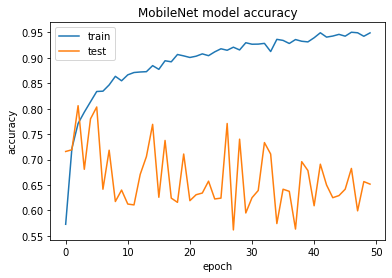

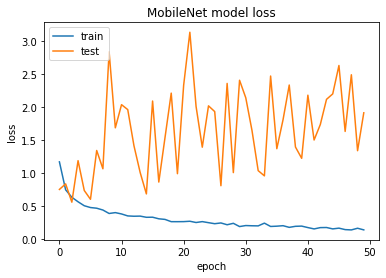

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('MobileNet model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('MobileNet model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

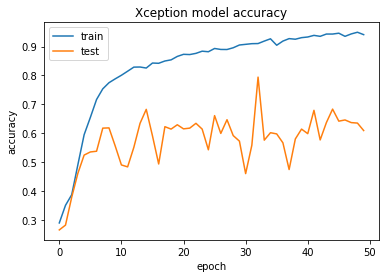

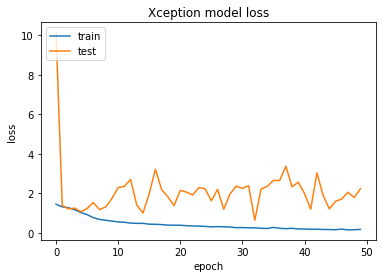

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Xception model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Xception model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

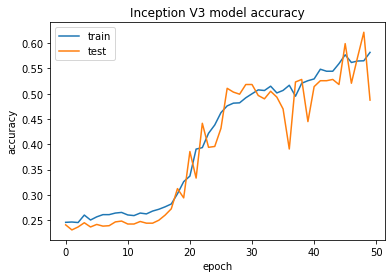

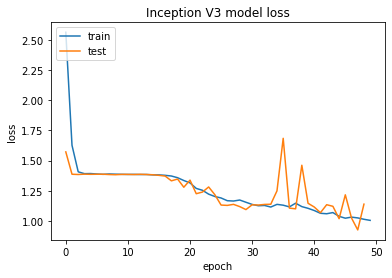

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Inception V3 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'][1:])
plt.title('Inception V3 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

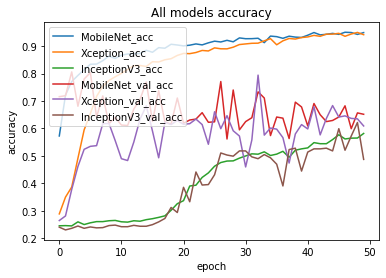

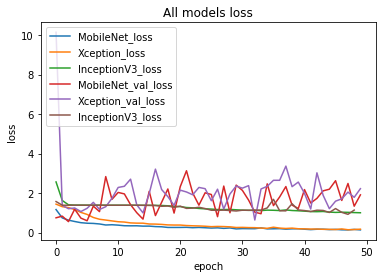

In [ ]:
plt.plot(history_1.history['accuracy'], label = 'MobileNet_acc')
plt.plot(history_2.history['accuracy'], label = 'Xception_acc')
plt.plot(history_3.history['accuracy'], label = 'InceptionV3_acc')

plt.plot(history_1.history['val_accuracy'], label = 'MobileNet_val_acc')
plt.plot(history_2.history['val_accuracy'], label = 'Xception_val_acc')
plt.plot(history_3.history['val_accuracy'], label = 'InceptionV3_val_acc')

plt.title('All models accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')

plt.show()
# summarize history for loss
plt.plot(history_1.history['loss'], label = 'MobileNet_loss')
plt.plot(history_2.history['loss'], label = 'Xception_loss')
plt.plot(history_3.history['loss'], label = 'InceptionV3_loss')

plt.plot(history_1.history['val_loss'], label = 'MobileNet_val_loss')
plt.plot(history_2.history['val_loss'], label = 'Xception_val_loss')
plt.plot(history_3.history['val_loss'][1:], label = 'InceptionV3_loss')

plt.title('All models loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

# **Ensemble**

In [ ]:
# model_1.save('./drive/MyDrive/models/model_1.h5')
# model_2.save('./drive/MyDrive/models/model_2.h5')
# model_3.save('./drive/MyDrive/models/model_3.h5')

In [ ]:
from keras.models import load_model

model_1 = load_model('./drive/MyDrive/models/model_1.h5')
model_2 = load_model('./drive/MyDrive/models/model_2.h5')
model_3 = load_model('./drive/MyDrive/models/model_3.h5')

In [ ]:
from deepstack.base import KerasMember

member1 = KerasMember(name="   MobileNet", keras_model=model_1, train_batches=(X_train, y_train), val_batches=(X_test, y_test))
member2 = KerasMember(name="    Xception", keras_model=model_2, train_batches=(X_train, y_train), val_batches=(X_test, y_test))
member3 = KerasMember(name="Inception V3", keras_model=model_3, train_batches=(X_train, y_train), val_batches=(X_test, y_test))

In [ ]:
# from deepstack.ensemble import StackEnsemble
# import sklearn
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import StackingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.tree import DecisionTreeClassifier

# stack = StackEnsemble()

# # 2nd Level Meta-Learner
# estimators = [
#     ('rf', RandomForestClassifier(verbose=0, n_estimators=200, max_depth=15, n_jobs=20, min_samples_split=30)),
#     ('etr', ExtraTreesClassifier(verbose=0, n_estimators=200, max_depth=10, n_jobs=20, min_samples_split=20)),
#     ('dtc', DecisionTreeClassifier(random_state=0, max_depth=3))
# ]
# # 3rd Level Meta-Learner
# clf = StackingClassifier(
#     estimators=estimators, final_estimator=LogisticRegression()
# )

# stack.model = clf
# stack.add_members([member1, member2, member3])
# stack.fit()
# stack.describe(metric=sklearn.metrics.accuracy_score)

In [ ]:
from deepstack.base import KerasMember
from deepstack.ensemble import StackEnsemble
from sklearn.linear_model import LogisticRegression

stack2 = StackEnsemble()
stack2.add_member(member1)  # Assumption: the data iterators of base-learners iterate over the same data and have same shape and classes.
stack2.add_member(member2)
stack2.add_member(member3)
stack2.fit()  # Fits meta-learner based on training batches from its members (base-learners)
stack2.describe()  # Prints information about ensemble performance based on validation data

Calling predict
   MobileNet - roc_auc_score: 0.9165
    Xception - roc_auc_score: 0.8211
Inception V3 - roc_auc_score: 0.7683
StackEnsemble roc_auc_score: 0.9347


0.9346531256730208

In [ ]:
import tensorflow

tensorflow.keras.utils.plot_model(stack2, to_file = 'model.png', show_layer_names=True)

# **정밀도, 재현율 확인**

              precision    recall  f1-score   support

           0       0.55      0.87      0.68       330
           1       0.69      0.87      0.77       283
           2       0.74      0.71      0.73       289
           3       0.95      0.14      0.24       298

    accuracy                           0.65      1200
   macro avg       0.73      0.65      0.60      1200
weighted avg       0.73      0.65      0.60      1200



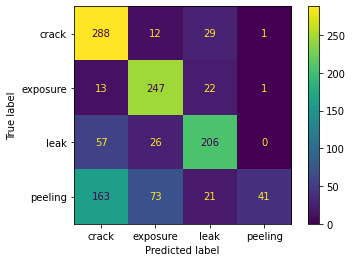

In [ ]:
# Model_1

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay

y_test_arg=np.argmax(y_test,axis=1)
y_pred_1 = np.argmax(model_1.predict(X_test),axis=1)

disp = ConfusionMatrixDisplay(confusion_matrix(y_test_arg, y_pred_1), display_labels= mlb.classes_)
disp.plot()
print(classification_report(y_test_arg,y_pred_1))

              precision    recall  f1-score   support

           0       0.56      0.89      0.69       330
           1       0.64      0.80      0.71       283
           2       0.65      0.68      0.66       289
           3       0.93      0.05      0.09       298

    accuracy                           0.61      1200
   macro avg       0.69      0.60      0.54      1200
weighted avg       0.69      0.61      0.54      1200



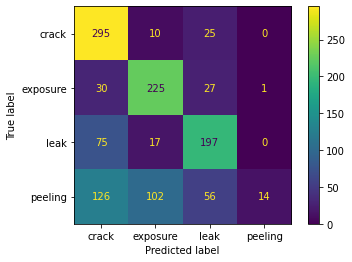

In [ ]:
# Model_2

y_pred_2 = np.argmax(model_2.predict(X_test),axis=1)

disp = ConfusionMatrixDisplay(confusion_matrix(y_test_arg, y_pred_2), display_labels= mlb.classes_)
disp.plot()
print(classification_report(y_test_arg,y_pred_2))

              precision    recall  f1-score   support

           0       0.80      0.37      0.51       330
           1       0.57      0.75      0.64       283
           2       0.38      0.76      0.51       289
           3       0.33      0.10      0.16       298

    accuracy                           0.49      1200
   macro avg       0.52      0.50      0.45      1200
weighted avg       0.53      0.49      0.45      1200



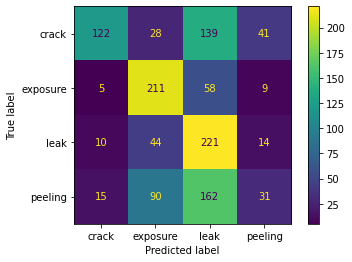

In [ ]:
# Model_3

y_pred_3 = np.argmax(model_3.predict(X_test),axis=1)

disp = ConfusionMatrixDisplay(confusion_matrix(y_test_arg, y_pred_3), display_labels= mlb.classes_)
disp.plot()
print(classification_report(y_test_arg,y_pred_3))